,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,B96 B98,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,B96 B98,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,B96 B98,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,B96 B98,C
887,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,B96 B98,C
888,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,B96 B98,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,0.0,0,0,349215,7.8958,B96 B98,S


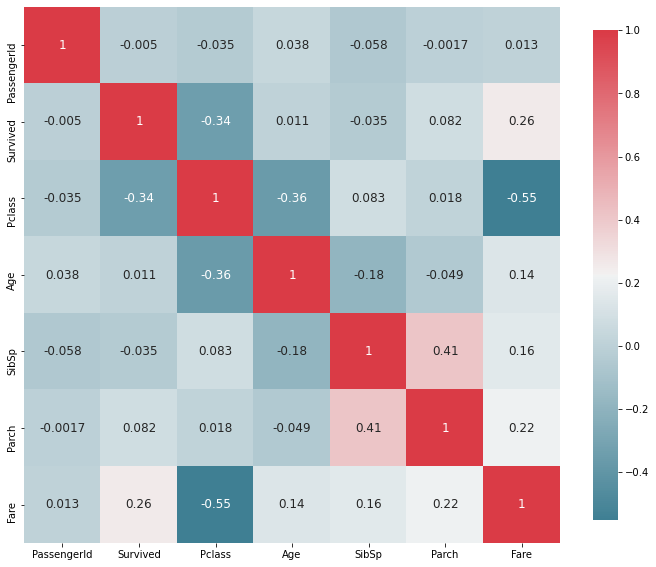

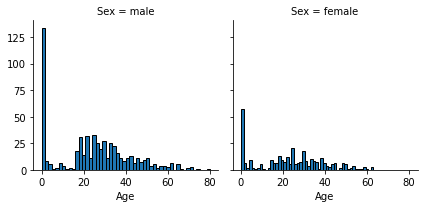

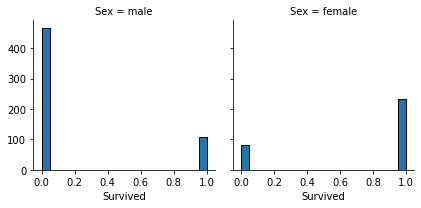

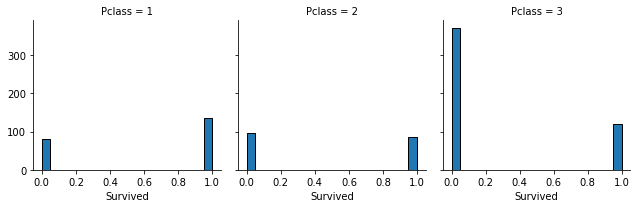

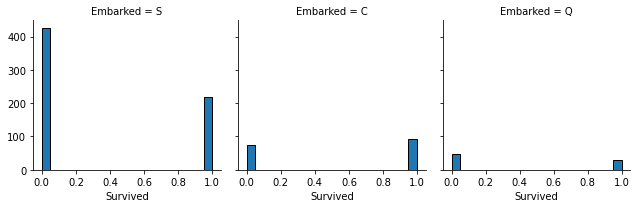

In [154]:
import numpy as np 
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#from sklearn.preprocessing import LabelEncoder

reader = csv.reader(open("titanic-passengers.csv", "r"), delimiter=';')
writer = csv.writer(open("output.csv", 'w'), delimiter=',')
writer.writerows(reader)
data=pd.read_csv('output.csv')
data.dropna(how = 'all')
data["Sex"].fillna("No Sex", inplace = True)
data["Survived"]=[0 if x=="No" else 1 for x in data["Survived"]]
data["Age"].fillna(0,inplace=True)
def clean(data,column):
    frequent=data[column].mode()[0]
    data[column].fillna(frequent,inplace=True)
for column in ['Embarked','Cabin']:
    clean(data,column)
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )#show the correlation between each possible pair of columns from less than -0.4 to 1 (from weakest to stongest)
plot_correlation_map(data)
g=sns.FacetGrid(data,col="Sex")
g.map(plt.hist,"Age",bins=50,edgecolor='black')
g=sns.FacetGrid(data,col="Sex")
g.map(plt.hist,"Survived",bins=20,edgecolor='black')
g=sns.FacetGrid(data,col="Pclass")
g.map(plt.hist,"Survived",bins=20,edgecolor='black')
g=sns.FacetGrid(data,col="Embarked")
g.map(plt.hist,"Survived",bins=20,edgecolor='black')
#data[["Pclass", "Name"]].groupby(["Name"], as_index=True).mean()
#data.drop("Name",axis=1,inplace=False)
data

In [115]:
for ColName in data[['Embarked','Cabin','SibSp','Parch','Pclass']]:
    print("{} = {}".format(ColName,len(data[ColName].unique())))

Embarked = 3
Cabin = 147
SibSp = 7
Parch = 7
Pclass = 3


In [116]:
data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [135]:
data[["Pclass", "Name"]].groupby(["Name"], as_index=True).mean()

,Pclass
Name,
"Abbing, Mr. Anthony",3
"Abbott, Mr. Rossmore Edward",3
"Abbott, Mrs. Stanton (Rosa Hunt)",3
"Abelson, Mr. Samuel",2
"Abelson, Mrs. Samuel (Hannah Wizosky)",2
...,...
"de Mulder, Mr. Theodore",3
"de Pelsmaeker, Mr. Alfons",3
"del Carlo, Mr. Sebastiano",2


In [136]:
data
#data.drop("Name",axis=1,inplace=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,B96 B98,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,B96 B98,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,B96 B98,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,B96 B98,C
887,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,B96 B98,C
888,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,B96 B98,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,0.0,0,0,349215,7.8958,B96 B98,S


In [155]:
l={}
for column in data["Name"]:
    x=column.split(',')[1]
    x=x.split('.')[0]
    l[i]=x
data["Title"]=l;
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,B96 B98,S,Mr
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mr
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,B96 B98,S,Mr
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,B96 B98,S,Mrs
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,B96 B98,C,Mrs
887,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,B96 B98,C,Mr
888,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,B96 B98,S,Miss
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,0.0,0,0,349215,7.8958,B96 B98,S,Mr


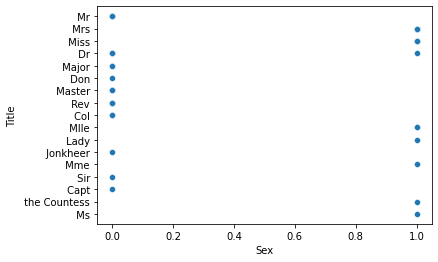

In [142]:
cleanup={"Sex":{"male":0, "female": 1}}
data.replace(cleanup)
data
sns.scatterplot(x="Sex", y="Title", data=data);

In [147]:
Title_Dictionary = {"Capt":"Officer","Col":"Officer","Major":"Officer","Dr":"Officer","Rev":"Officer","Jonkheer":"Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Miss",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"
                    }
for i in range(len(data["Title"])):
    for j in Title_Dictionary:
        if j==data["Title"][i]:
            data["Title"][i]=Title_Dictionary[j]
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,B96 B98,S,Mr
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,S,Mr
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,B96 B98,S,Mr
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,B96 B98,S,Mrs
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr
5,105,0,3,"Gustafsson, Mr. Anders Vilhelm",0,37.0,2,0,3101276,7.9250,B96 B98,S,Mr
6,576,0,3,"Patchett, Mr. George",0,19.0,0,0,358585,14.5000,B96 B98,S,Mr
7,382,1,3,"Nakid, Miss. Maria (""Mary"")",1,1.0,0,2,2653,15.7417,B96 B98,C,Miss
8,228,0,3,"Lovell, Mr. John Hall (""Henry"")",0,20.5,0,0,A/5 21173,7.2500,B96 B98,S,Mr
9,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",1,42.0,1,0,SC/AH 3085,26.0000,B96 B98,S,Mrs


In [106]:
for j in list(Title_Dictionary):
    print(j)

Capt
Col
Major
Dr
Rev
Jonkheer
Don
Sir
Lady
the Countess
Dona
Mme
Mlle
Miss
Ms
Mr
Mrs
Master


In [105]:
x=0
for i in range(len(data["Title"])):
    print(data["Title"][i],x)
    x+=1

 Mr 0
 Mr 1
 Mr 2
 Mrs 3
 Mr 4
 Mr 5
 Mr 6
 Miss 7
 Mr 8
 Mrs 9
 Mr 10
 Miss 11
 Mrs 12
 Mr 13
 Mr 14
 Mr 15
 Mr 16
 Mr 17
 Mr 18
 Mr 19
 Miss 20
 Mr 21
 Mr 22
 Mr 23
 Mrs 24
 Mr 25
 Mr 26
 Dr 27
 Mr 28
 Miss 29
 Mr 30
 Mr 31
 Mr 32
 Major 33
 Mrs 34
 Don 35
 Mr 36
 Mr 37
 Mr 38
 Miss 39
 Miss 40
 Mr 41
 Mr 42
 Miss 43
 Mr 44
 Miss 45
 Mr 46
 Master 47
 Dr 48
 Mr 49
 Mr 50
 Mr 51
 Mr 52
 Mr 53
 Mr 54
 Mr 55
 Mr 56
 Mr 57
 Mr 58
 Mr 59
 Mrs 60
 Mrs 61
 Miss 62
 Miss 63
 Master 64
 Miss 65
 Mr 66
 Rev 67
 Mr 68
 Mrs 69
 Mrs 70
 Miss 71
 Mr 72
 Mrs 73
 Mr 74
 Mr 75
 Miss 76
 Mr 77
 Miss 78
 Miss 79
 Miss 80
 Mrs 81
 Master 82
 Mr 83
 Mr 84
 Mr 85
 Mr 86
 Miss 87
 Mr 88
 Mr 89
 Mrs 90
 Mrs 91
 Miss 92
 Mrs 93
 Mr 94
 Mr 95
 Mr 96
 Miss 97
 Mrs 98
 Mr 99
 Mr 100
 Mr 101
 Master 102
 Mr 103
 Mr 104
 Mr 105
 Mr 106
 Mrs 107
 Miss 108
 Mr 109
 Mr 110
 Master 111
 Mr 112
 Mr 113
 Mr 114
 Mr 115
 Mr 116
 Mr 117
 Mr 118
 Mr 119
 Miss 120
 Mr 121
 Mr 122
 Col 123
 Mr 124
 Mr 125
 Mr 126
 Mr 127
 M

In [150]:
Title_Dictionary = {"Capt":"Officer","Col":"Officer","Major":"Officer","Dr":"Officer","Rev":"Officer","Jonkheer":"Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Miss",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"
                    }
TitleFam=[]
for i in range (0,891) :
    ch=Title_Dictionary[data['Title'][i]]
    TitleFam.append(ch)
data['TitleFam']=TitleFam
data

KeyError: ' Mr'

In [156]:
Title_Dictionary = {"Capt":"Officer","Col":"Officer","Major":"Officer","Dr":"Officer","Rev":"Officer","Jonkheer":"Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Miss",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"
                    }
data['Title'].update(pd.Series(Title_Dictionary))
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,B96 B98,S,Mr
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mr
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,B96 B98,S,Mr
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,B96 B98,S,Mrs
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,B96 B98,C,Mrs
887,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,B96 B98,C,Mr
888,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,B96 B98,S,Miss
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,0.0,0,0,349215,7.8958,B96 B98,S,Mr


KeyError: 0